In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl/matches.csv
/kaggle/input/ipl/deliveries.csv


In [2]:
delivery = pd.read_csv('/kaggle/input/ipl/deliveries.csv')
match = pd.read_csv('/kaggle/input/ipl/matches.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
delivery.shape

(150460, 21)

In [6]:
delivery.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [7]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [8]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [10]:
match.shape

(636, 18)

In [11]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [13]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [12]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [14]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

*As we can see, the columns 'city', 'winner', 'umpire1', 'umpire2', 'umpire3' have null values*

In [ ]:
columns_of_interest = ['season', 'city', 'team1', 'team2', 'venue', 'umpire1', 'umpire2', 'umpire3']

unique_values = match[columns_of_interest].apply(lambda x: x.unique())

print("Unique values in specified columns:")
print(unique_values)

I want to see the teams of ipl and then rename them with short forms. It will be more convenient.

In [ ]:
match['team1'].unique()

In [ ]:
match.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [15]:
delivery['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [16]:
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [18]:
delivery['batting_team']

0         SRH
1         SRH
2         SRH
3         SRH
4         SRH
         ... 
150455    RCB
150456    RCB
150457    RCB
150458    RCB
150459    RCB
Name: batting_team, Length: 150460, dtype: object

In [ ]:
match['team1'].unique()

In [19]:
batsman_grp = delivery.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()

In [21]:
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,SRH,BCJ Cutting,16
1,1,1,SRH,DA Warner,14
2,1,1,SRH,DJ Hooda,16
3,1,1,SRH,MC Henriques,52
4,1,1,SRH,S Dhawan,40


In [22]:
team_stats = batsmen.groupby('batting_team').agg(
    num_batsmen=('batsman', 'nunique'),  # Count of unique batsmen
    total_runs=('batsman_runs', 'sum')  # Total runs made by the team
).reset_index()

print(team_stats)

   batting_team  num_batsmen  total_runs
0           CSK           46       19822
1            DC           58       10885
2            DD           90       20772
3            GL           24        4629
4           KKR           81       20660
5           KTK           19        1758
6          KXIP           87       21827
7            MI           81       23108
8            PW           43        6040
9           RCB           99       22244
10          RPS           31        4332
11           RR           81       16784
12          SRH           43       11068


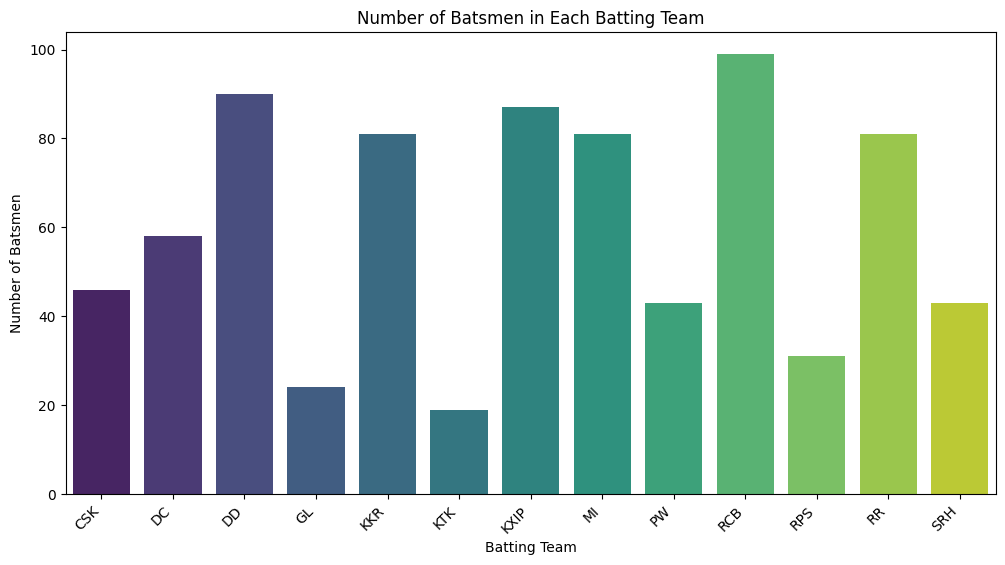

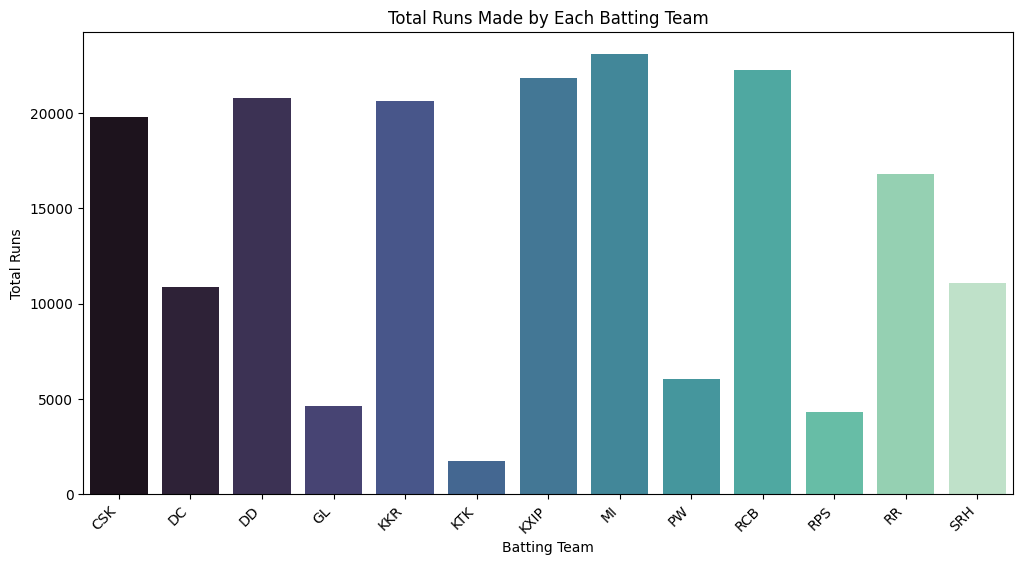

In [23]:
# Creating a bar chart for num_batsmen
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='num_batsmen', data=team_stats, palette='viridis')
plt.title('Number of Batsmen in Each Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Number of Batsmen')
plt.xticks(rotation=45, ha='right')
plt.show()

# Creating a bar chart for total_runs
plt.figure(figsize=(12, 6))
sns.barplot(x='batting_team', y='total_runs', data=team_stats, palette='mako')
plt.title('Total Runs Made by Each Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.show()

**From the above analysis we can find some insights. The unique number of batsman for a team is highest for Royal Challengers Bangalore, they have given chance to 99 players to bat! 
Again we can see that Mumbai Indians with Kings XI Punjab are the highest run-makers in total.**

In [24]:
batsman_stats = batsmen.groupby('batsman')['batsman_runs'].sum().reset_index()
batsman_stats = batsman_stats.sort_values(by='batsman_runs', ascending=False)

batsman_stats.head()

,batsman,batsman_runs
374,SK Raina,4548
431,V Kohli,4423
323,RG Sharma,4207
137,G Gambhir,4132
103,DA Warner,4014


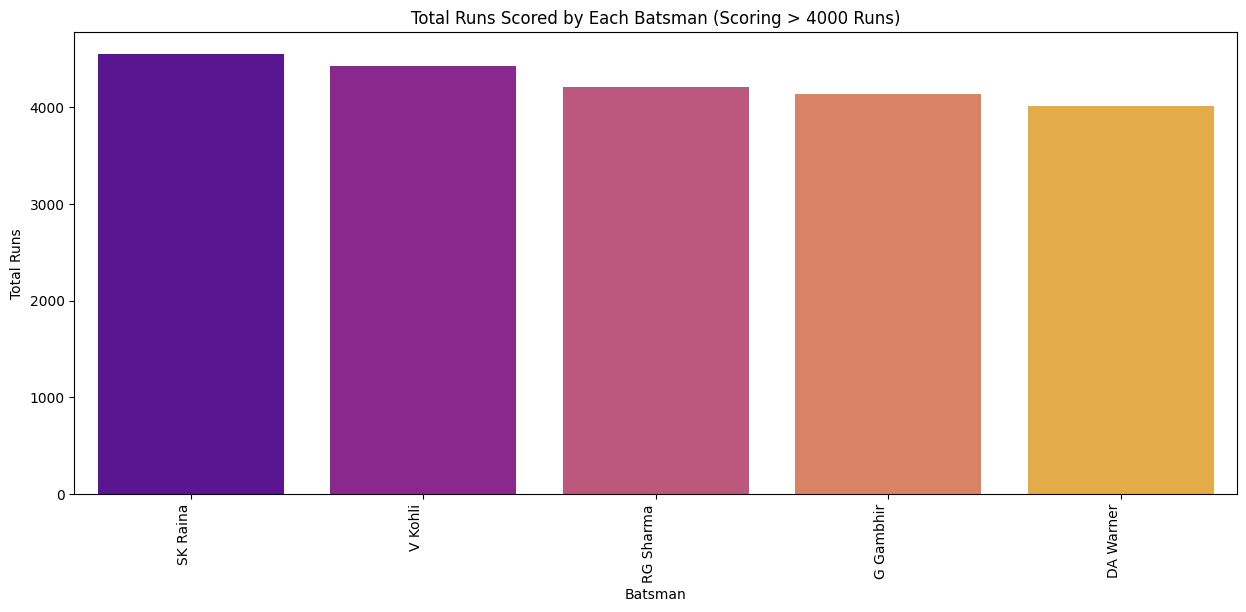

In [25]:
batsman_stats = batsmen.groupby('batsman')['batsman_runs'].sum().reset_index()

#batsmen with total runs greater than 4000
top_batsmen = batsman_stats[batsman_stats['batsman_runs'] > 4000]
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='batsman', y='batsman_runs', data=top_batsmen, palette='plasma')
plt.title('Total Runs Scored by Each Batsman (Scoring > 4000 Runs)')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=90, ha='right')
plt.show()

In [26]:
balls_faced = delivery[delivery["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
#batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        #right_on=["match_id", "inning", "batsman"], how="left")

In [27]:
balls_faced.head()

,match_id,inning,batsman,balls_faced
0,1,1,BCJ Cutting,6
1,1,1,DA Warner,8
2,1,1,DJ Hooda,12
3,1,1,MC Henriques,37
4,1,1,S Dhawan,31


In [28]:
total_balls_faced = balls_faced.groupby('batsman')['balls_faced'].sum().reset_index()

print(total_balls_faced)

            batsman  balls_faced
0    A Ashish Reddy          193
1        A Chandila            7
2          A Chopra           71
3       A Choudhary           20
4        A Flintoff           53
..              ...          ...
456     YV Takawale          178
457   Yashpal Singh           66
458     Younis Khan            7
459    Yuvraj Singh         1974
460          Z Khan          141

[461 rows x 2 columns]


In [29]:
total_balls_faced.head()

,batsman,balls_faced
0,A Ashish Reddy,193
1,A Chandila,7
2,A Chopra,71
3,A Choudhary,20
4,A Flintoff,53


In [30]:
merged_stats = pd.merge(batsman_stats, balls_faced, on='batsman', how='inner')
merged_stats.head()

,batsman,batsman_runs,match_id,inning,balls_faced
0,A Ashish Reddy,280,346,1,10
1,A Ashish Reddy,280,352,2,3
2,A Ashish Reddy,280,359,2,8
3,A Ashish Reddy,280,373,2,4
4,A Ashish Reddy,280,376,1,4


In [31]:
fours = delivery[ delivery["batsman_runs"] == 4]
sixes = delivery[ delivery["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [32]:
fours_per_batsman.head()

,match_id,inning,batsman,4s
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2


In [33]:
sixes_per_batsman.head()

,match_id,inning,batsman,6s
0,1,1,BCJ Cutting,2
1,1,1,DA Warner,1
2,1,1,DJ Hooda,1
3,1,1,MC Henriques,2
4,1,1,Yuvraj Singh,3


In [34]:
# Find the batsman with the most fours
most_fours_batsman = fours_per_batsman.loc[fours_per_batsman["4s"].idxmax()]

# Find the batsman with the most sixes
most_sixes_batsman = sixes_per_batsman.loc[sixes_per_batsman["6s"].idxmax()]
print("Batsman with the most fours:")
print(most_fours_batsman)
print("\nBatsman with the most sixes:")
print(most_sixes_batsman)

Batsman with the most fours:
match_id            243
inning                2
batsman     PC Valthaty
4s                   19
Name: 2226, dtype: object

Batsman with the most sixes:
match_id         411
inning             1
batsman     CH Gayle
6s                17
Name: 2120, dtype: object


In [35]:
most_fours_batsman

match_id            243
inning                2
batsman     PC Valthaty
4s                   19
Name: 2226, dtype: object

In [36]:
most_sixes_batsman

match_id         411
inning             1
batsman     CH Gayle
6s                17
Name: 2120, dtype: object

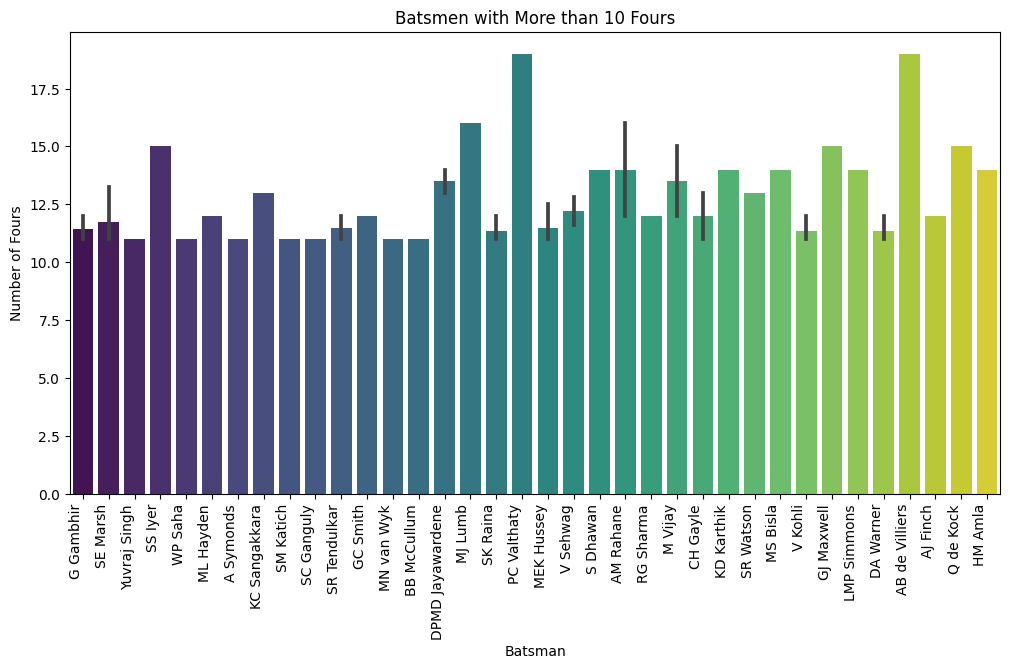

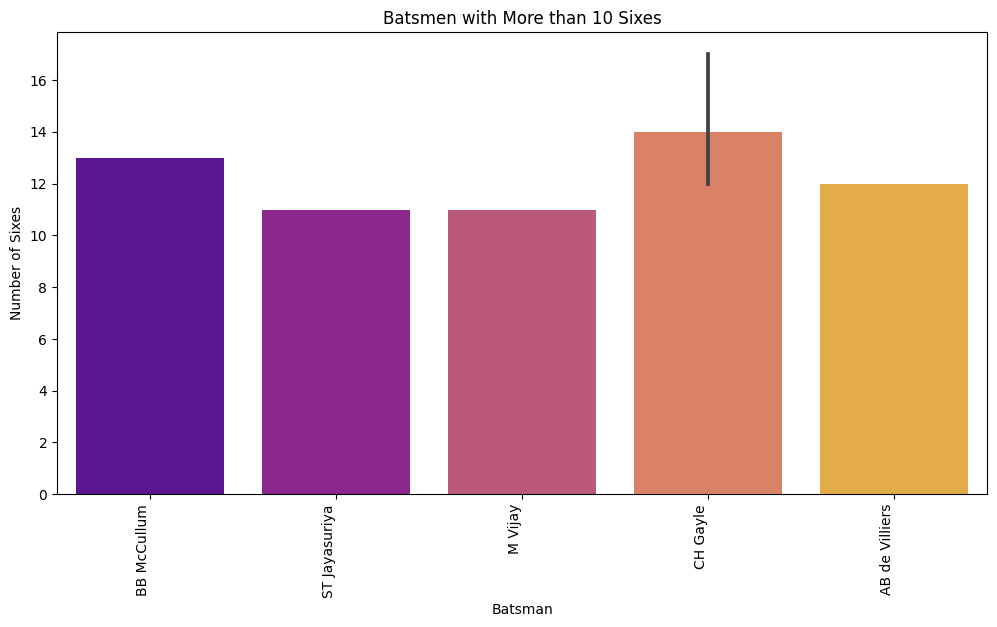

In [37]:
# Filter batsmen with more than 10 fours
batsmen_with_more_than_10_fours = fours_per_batsman[fours_per_batsman["4s"] > 10]

# Filter batsmen with more than 10 sixes
batsmen_with_more_than_10_sixes = sixes_per_batsman[sixes_per_batsman["6s"] > 10]

# Plotting a bar chart for batsmen with more than 10 fours
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman', y='4s', data=batsmen_with_more_than_10_fours, palette='viridis')
plt.title('Batsmen with More than 10 Fours')
plt.xlabel('Batsman')
plt.ylabel('Number of Fours')
plt.xticks(rotation=90, ha='right')
plt.show()

# Plotting a bar chart for batsmen with more than 10 sixes
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman', y='6s', data=batsmen_with_more_than_10_sixes, palette='plasma')
plt.title('Batsmen with More than 10 Sixes')
plt.xlabel('Batsman')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=90, ha='right')
plt.show()

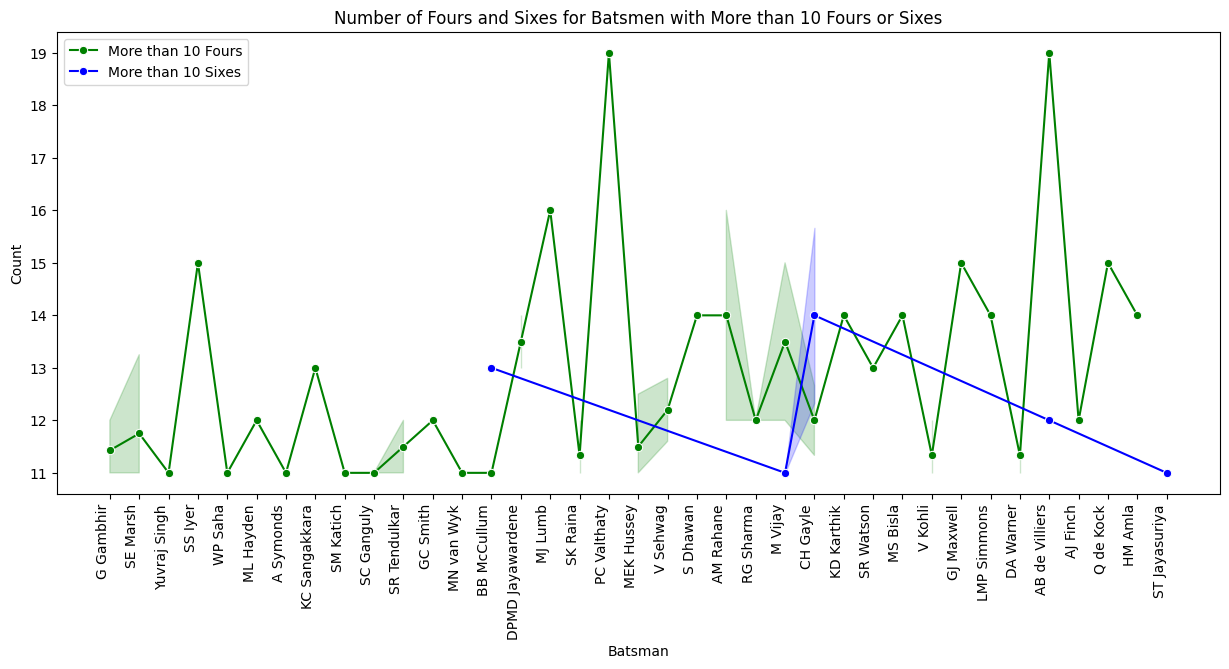

In [38]:
merged_data = pd.merge(batsmen_with_more_than_10_fours, batsmen_with_more_than_10_sixes, on='batsman', how='outer')

# Plotting a line chart for both scenarios
plt.figure(figsize=(15, 6))
sns.lineplot(x='batsman', y='4s', data=merged_data, label='More than 10 Fours', marker='o', color='green')
sns.lineplot(x='batsman', y='6s', data=merged_data, label='More than 10 Sixes', marker='o', color='blue')

plt.title('Number of Fours and Sixes for Batsmen with More than 10 Fours or Sixes')
plt.xlabel('Batsman')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()